In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# !pip install mlxtend
# !pip cache purge

In [3]:
from mlxtend.plotting import plot_decision_regions

In [4]:
from sklearn.datasets import make_circles, make_moons

In [5]:
# X, y = make_circles(n_samples=100, noise=0.12, factor=0.2, random_state=666)
X, y = make_moons(n_samples=100, noise=0.05, random_state=666)

In [6]:
X[:5]

array([[ 1.71657517,  0.17895829],
       [ 0.0121074 ,  0.26198486],
       [-0.59521354,  0.79762636],
       [-0.75813546,  0.72093634],
       [-0.91067555,  0.42330777]])

In [7]:
y[:5]

array([1, 1, 0, 0, 0], dtype=int64)

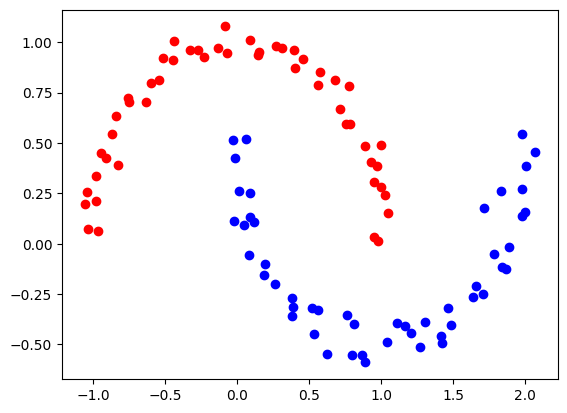

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='r')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [11]:
logistic = LogisticRegression(n_jobs=-1, )

In [12]:
knn.fit(X, y)

KNeighborsClassifier(n_jobs=-1)

In [13]:
logistic.fit(X, y)

LogisticRegression(n_jobs=-1)

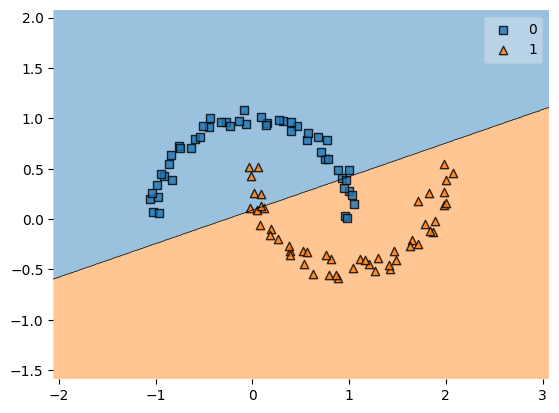

In [14]:
plot_decision_regions(X, y, logistic)
plt.show()

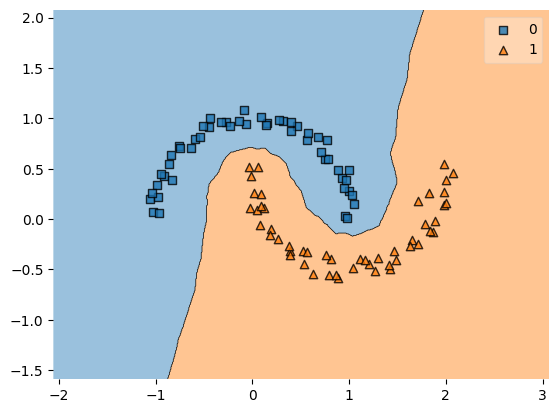

In [15]:
plot_decision_regions(X, y, knn)
plt.show()

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [17]:
iris_data = load_iris()

In [18]:
X = iris_data.data
y = iris_data.target

In [19]:
X = X[:100]
y = y[:100]

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=666,
                                                    shuffle=True,
                                                    stratify=y)

In [23]:
Counter(y_train)

Counter({1: 43, 0: 42})

In [24]:
Counter(y_test)

Counter({0: 8, 1: 7})

In [25]:
knn = KNeighborsClassifier(n_jobs=-1)
logit = LogisticRegression(n_jobs=-1)

In [26]:
# knn.fit(X_train, y_train)
logit.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [27]:
# y_pred = knn.predict(X_test)
y_pred = logit.predict(X_test)

In [28]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [29]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred,)
conf_matrix

array([[8, 0],
       [0, 7]], dtype=int64)

In [32]:
import seaborn as sns

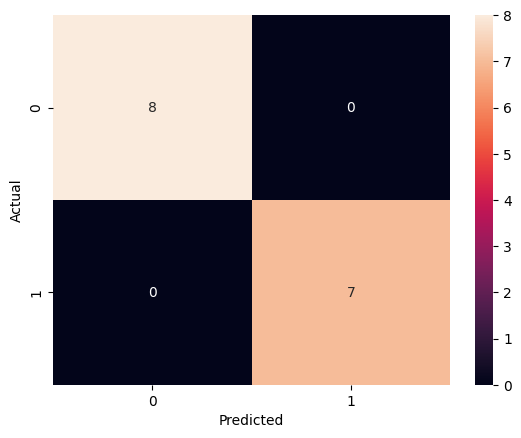

In [33]:
sns.heatmap(conf_matrix, annot=True, )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Precision(P) = $\frac{TP}{TP + FP}$
* Recall(R) = $\frac{TP}{TP + FN}$
* F1 = $\frac{2PR}{P + R}$
* Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

In [35]:
accuracy_score(y_test, y_pred)

1.0

In [36]:
precision_score(y_test, y_pred)

1.0

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

